In [23]:
from numpy import *

In [24]:
import operator

In [25]:
from os import listdir

In [26]:
import matplotlib

In [27]:
import matplotlib.pyplot as plt

In [28]:
import pandas as pd

In [29]:
import numpy.linalg

In [30]:
from scipy.stats.stats import pearsonr

In [31]:
def kernel(point,xmat,k):
    m,n= shape(xmat)
    weights=mat(eye((m)))
    for j in range(m):
     diff = point - X[j]
     weights[j,j]= exp(diff*diff.T/(-2*k**2))
    return weights    

In [32]:
def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [33]:
def localWeightRegression(xmat,ymat,k):
    m,n=shape(xmat)
    ypred=zeros(m)
    for i in range(m):
     ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred

In [34]:
#load data points
data=pd.read_csv('tips.csv')
bill=array(data.totbill)
tip=array(data.tip)

In [35]:
data

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4
5,6,25.29,4.71,M,No,Sun,Night,4
6,7,8.77,2.00,M,No,Sun,Night,2
7,8,26.88,3.12,M,No,Sun,Night,4
8,9,15.04,1.96,M,No,Sun,Night,2
9,10,14.78,3.23,M,No,Sun,Night,2


In [36]:
#Preparing and add 1 in bill
mbill=mat(bill)
mtip=mat(tip)
m=shape(mbill)[1]
one=mat(ones(m))
X=hstack((one.T,mbill.T))

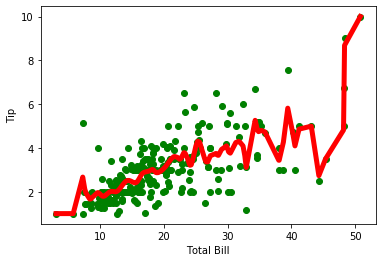

In [37]:
#set k here
ypred=localWeightRegression(X,mtip,0.5)
SortIndex=X[:,1].argsort(0)
xsort=X[SortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color='red',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()